In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import preprocessor
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

In [48]:
payment_cols = ["out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries",
				   "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "collections_12_mths_ex_med", "acc_now_delinq",
				   "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy", "bc_util", "chargeoff_within_12_mths",
				   "delinq_amnt", "mo_sin_old_il_acct", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "tot_hi_cred_lim",
				   "total_bal_ex_mort", "total_bc_limit", "total_il_high_credit_limit", "grade"]

In [49]:
lc = preprocessor.loadData(["data/LC_2007_2011_loan_data.csv",
							"data/LC_2012_2013_loan_data.csv",
							"data/LC_2014_loan_data.csv"])
lc = preprocessor.preprocess(lc)

print("Dimensions: ", lc.shape)

Dimensions:  (305340, 73)


In [50]:
payment_data = lc.loc[:, payment_cols]
lc.drop(payment_cols, axis=1, inplace=True)
lc.drop("issue_date", axis=1, inplace=True) #drop issue date column

In [51]:
#create dummy variables for categorical variables
lc = pd.get_dummies(lc, columns=["home_ownership", "verification_status", "purpose", "sub_grade"])

In [52]:
#reorder columns so variable being predicted is in first column
cols = lc.columns.tolist()
cols.insert(0, cols.pop(cols.index('total_return')))
lc = lc.loc[:, cols]

In [53]:
data = lc.values
X = data[:, 1:]
y = data[:, 0]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
model = RandomForestRegressor(n_estimators=100, n_jobs=8)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=8, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [56]:
y_prediction = model.predict(X_test)

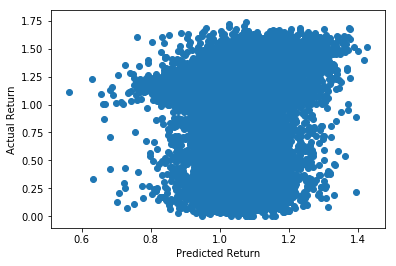

In [60]:
plt.scatter(y_prediction, y_test)

plt.xlabel("Predicted Return")
plt.ylabel("Actual Return")

In [61]:
np.corrcoef(y_prediction, y_test)[0, 1]

0.11664584286630218